<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading

**Chapter 04 &mdash; Vectorized Backtesting**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Making Use of Vectorization

### Vectorization with NumPy 

In [2]:
v = [1, 2, 3, 4, 5]

In [3]:
sm = [2 * i for i in v]

In [4]:
sm

[2, 4, 6, 8, 10]

In [5]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [6]:
import numpy as np

In [7]:
a = np.array(v)

In [8]:
a

array([1, 2, 3, 4, 5])

In [9]:
type(a)

numpy.ndarray

In [10]:
2 * a 

array([ 2,  4,  6,  8, 10])

In [11]:
0.5 * a + 2

array([2.5, 3. , 3.5, 4. , 4.5])

In [12]:
a = np.arange(12).reshape((4, 3))

In [13]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [14]:
2 * a

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [15]:
a ** 2

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121]])

In [16]:
a.mean()

5.5

In [17]:
np.mean(a)

5.5

In [18]:
a.mean(axis=0)

array([4.5, 5.5, 6.5])

In [19]:
np.mean(a, axis=1)

array([ 1.,  4.,  7., 10.])

### Vectorization with pandas

In [20]:
import numpy as np

In [21]:
import pandas as pd

In [22]:
a = np.arange(15).reshape(5, 3)

In [23]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [24]:
columns = list('abc')

In [25]:
columns

['a', 'b', 'c']

In [26]:
index = pd.date_range('2017-7-1', periods=5, freq='B')

In [27]:
index

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07'],
              dtype='datetime64[ns]', freq='B')

In [28]:
df = pd.DataFrame(a, columns=columns, index=index)

In [29]:
df

,a,b,c
2017-07-03,0,1,2
2017-07-04,3,4,5
2017-07-05,6,7,8
2017-07-06,9,10,11
2017-07-07,12,13,14


In [30]:
2 * df

,a,b,c
2017-07-03,0,2,4
2017-07-04,6,8,10
2017-07-05,12,14,16
2017-07-06,18,20,22
2017-07-07,24,26,28


In [31]:
df.sum()

a    30
b    35
c    40
dtype: int64

In [32]:
np.mean(df)

a    6.0
b    7.0
c    8.0
dtype: float64

In [33]:
df['a'] + df['c']

2017-07-03     2
2017-07-04     8
2017-07-05    14
2017-07-06    20
2017-07-07    26
Freq: B, dtype: int64

In [34]:
0.5 * df.a + 2 * df.b - df.c

2017-07-03     0.0
2017-07-04     4.5
2017-07-05     9.0
2017-07-06    13.5
2017-07-07    18.0
Freq: B, dtype: float64

In [35]:
df['a'] > 5

2017-07-03    False
2017-07-04    False
2017-07-05     True
2017-07-06     True
2017-07-07     True
Freq: B, Name: a, dtype: bool

In [36]:
df[df['a'] > 5]

,a,b,c
2017-07-05,6,7,8
2017-07-06,9,10,11
2017-07-07,12,13,14


In [37]:
df['c'] > df['b']

2017-07-03    True
2017-07-04    True
2017-07-05    True
2017-07-06    True
2017-07-07    True
Freq: B, dtype: bool

In [38]:
0.15 * df.a + df.b > df.c

2017-07-03    False
2017-07-04    False
2017-07-05    False
2017-07-06     True
2017-07-07     True
Freq: B, dtype: bool

## Strategies based on Simple Moving Averages

### Getting into the Basics 

In [39]:
%matplotlib inline
import pandas as pd
import datetime

In [40]:
quandl_api_key = 'tazR87u-Jc7PsHZ2XV1-'
import quandl as q

In [41]:
#data = q.get('EIA/PET_RWTC_D')
#data = q.get('EOD/AAPL', start_date='2010-1-1',end_date='2016-10-31', api_key=quandl_api_key)
data = q.get('WIKI/AAPL', start_date='2010-1-1',end_date='2016-10-31', api_key=quandl_api_key)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1720 entries, 2010-01-04 to 2016-10-31
Data columns (total 12 columns):
Open           1720 non-null float64
High           1720 non-null float64
Low            1720 non-null float64
Close          1720 non-null float64
Volume         1720 non-null float64
Ex-Dividend    1720 non-null float64
Split Ratio    1720 non-null float64
Adj. Open      1720 non-null float64
Adj. High      1720 non-null float64
Adj. Low       1720 non-null float64
Adj. Close     1720 non-null float64
Adj. Volume    1720 non-null float64
dtypes: float64(12)
memory usage: 174.7 KB


In [43]:
data = data['Adj. Close']

In [44]:
data

Date
2010-01-04     27.503268
2010-01-05     27.550818
2010-01-06     27.112585
2010-01-07     27.062465
2010-01-08     27.242385
2010-01-11     27.002063
2010-01-12     26.694915
2010-01-13     27.071461
2010-01-14     26.914674
2010-01-15     26.464875
2010-01-19     27.635637
2010-01-20     27.209613
2010-01-21     26.740152
2010-01-22     25.413631
2010-01-25     26.097968
2010-01-26     26.466160
2010-01-27     26.715991
2010-01-28     25.611543
2010-01-29     24.682772
2010-02-01     25.025519
2010-02-02     25.170740
2010-02-03     25.603832
2010-02-04     24.681102
2010-02-05     25.119334
2010-02-08     24.947126
2010-02-09     25.213149
2010-02-10     25.075125
2010-02-11     25.531864
2010-02-12     25.751623
2010-02-16     26.139735
                 ...    
2016-09-20    111.588120
2016-09-21    111.568469
2016-09-22    112.619797
2016-09-23    110.743128
2016-09-26    110.910161
2016-09-27    111.116497
2016-09-28    111.961489
2016-09-29    110.222377
2016-09-30    111.07

In [45]:
data = pd.DataFrame(data)

In [46]:
data.rename(columns={'Adj. Close': 'price'}, inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1720 entries, 2010-01-04 to 2016-10-31
Data columns (total 1 columns):
price    1720 non-null float64
dtypes: float64(1)
memory usage: 26.9 KB


In [48]:
data['SMA1'] = data['price'].rolling(42).mean()

In [49]:
data['SMA2'] = data['price'].rolling(252).mean()

In [50]:
data.tail()

,price,SMA1,SMA2
Date,,,
2016-10-25,116.186451,110.569076,102.346811
2016-10-26,113.572870,110.771435,102.360201
2016-10-27,112.482240,110.950633,102.351246
2016-10-28,111.735503,111.131235,102.334516
2016-10-31,111.558644,111.305286,102.321017


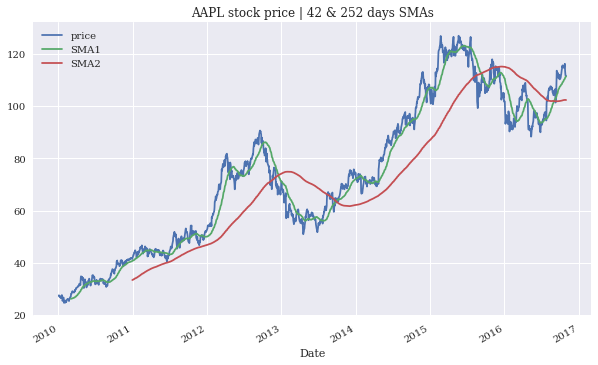

In [51]:
data.plot(title='AAPL stock price | 42 & 252 days SMAs', figsize=(10, 6))
# plt.savefig('../../images/ch04/sma_plot_1.png')

In [52]:
import numpy as np

In [53]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [54]:
data.dropna(inplace=True)

In [55]:
data

,price,SMA1,SMA2,position
Date,,,,
2010-12-31,41.453456,40.732362,33.393369,1
2011-01-03,42.354338,40.794202,33.452302,1
2011-01-04,42.575382,40.850779,33.511923,1
2011-01-05,42.923655,40.898910,33.574665,1
2011-01-06,42.888956,40.949704,33.637469,1
2011-01-07,43.196105,41.003252,33.700777,1
2011-01-10,44.010241,41.083955,33.768270,1
2011-01-11,43.905502,41.156198,33.836566,1
2011-01-12,44.262770,41.241155,33.904786,1


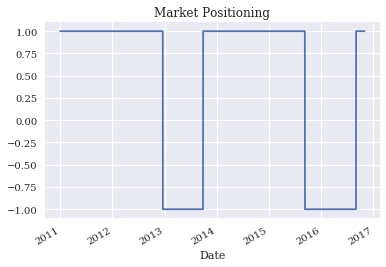

In [56]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning')
# plt.savefig('../../images/ch04/sma_plot_2.png')

In [57]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [58]:
data['test_ret'] = (data['price'] / data['price'].shift(1)) #-1

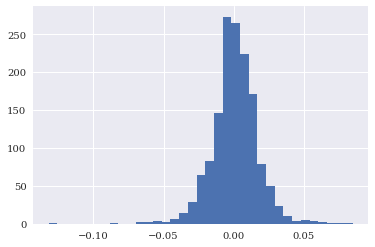

In [59]:
data['returns'].hist(bins=35)
# plt.savefig('../../images/ch04/sma_plot_3.png')

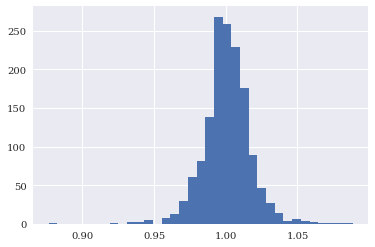

In [60]:
data['test_ret'].hist(bins=35)

In [61]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [62]:
data['test_strat'] = data['position'].shift(1) * data['test_ret']
data

,price,SMA1,SMA2,position,returns,test_ret,strategy,test_strat
Date,,,,,,,,
2010-12-31,41.453456,40.732362,33.393369,1,NaN,NaN,NaN,NaN
2011-01-03,42.354338,40.794202,33.452302,1,0.021500,1.021732,0.021500,1.021732
2011-01-04,42.575382,40.850779,33.511923,1,0.005205,1.005219,0.005205,1.005219
2011-01-05,42.923655,40.898910,33.574665,1,0.008147,1.008180,0.008147,1.008180
2011-01-06,42.888956,40.949704,33.637469,1,-0.000809,0.999192,-0.000809,0.999192
2011-01-07,43.196105,41.003252,33.700777,1,0.007136,1.007161,0.007136,1.007161
2011-01-10,44.010241,41.083955,33.768270,1,0.018672,1.018847,0.018672,1.018847
2011-01-11,43.905502,41.156198,33.836566,1,-0.002383,0.997620,-0.002383,0.997620
2011-01-12,44.262770,41.241155,33.904786,1,0.008104,1.008137,0.008104,1.008137


In [63]:
data[['returns', 'strategy']].sum()

returns     0.989979
strategy    1.170623
dtype: float64

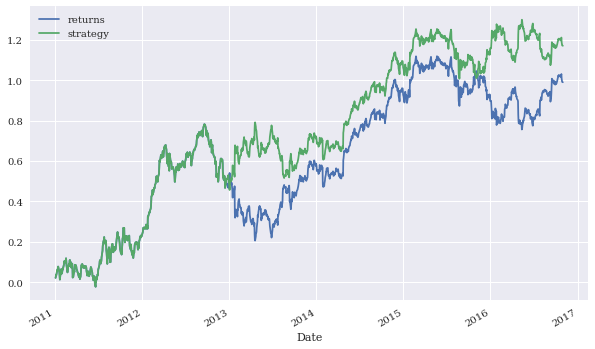

In [64]:
data[['returns', 'strategy']].cumsum().plot(figsize=(10, 6))

In [65]:
#data[['test_ret', 'test_strat']].cumsum().plot(figsize=(10, 6))

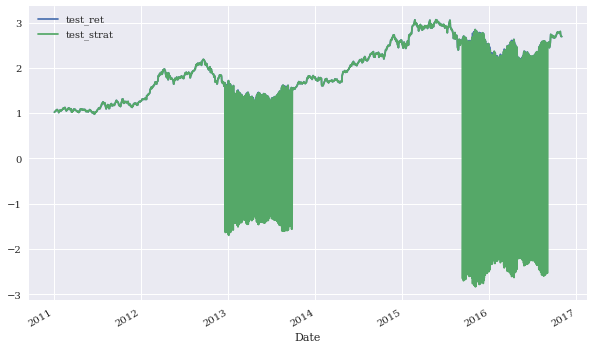

In [66]:
data[['test_ret', 'test_strat']].cumprod().plot(figsize=(10, 6))

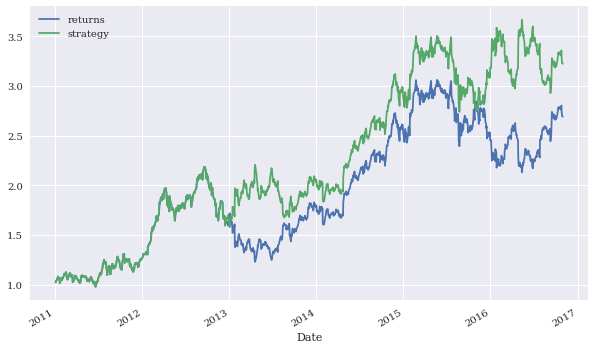

In [67]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
# plt.savefig('../../images/ch04/sma_plot_4.png')

In [68]:
data[['returns', 'strategy']].mean() * 252

returns     0.169942
strategy    0.200952
dtype: float64

In [69]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.263673
strategy    0.263586
dtype: float64

In [70]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [71]:
data['cummax'] = data['cumret'].cummax()

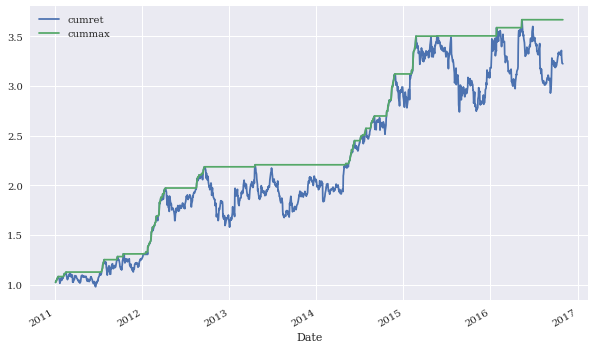

In [72]:
data[['cumret', 'cummax']].plot(figsize=(10, 6))
# plt.savefig('../../images/ch04/sma_plot_5.png')

In [73]:
drawdown = (data['cummax'] - data['cumret'])
drawdown

Date
2010-12-31         NaN
2011-01-03    0.000000
2011-01-04    0.000000
2011-01-05    0.000000
2011-01-06    0.000837
2011-01-07    0.000000
2011-01-10    0.000000
2011-01-11    0.002527
2011-01-12    0.000000
2011-01-13    0.000000
2011-01-14    0.000000
2011-01-18    0.024275
2011-01-19    0.029886
2011-01-20    0.048983
2011-01-21    0.067460
2011-01-24    0.034195
2011-01-25    0.021949
2011-01-26    0.014354
2011-01-27    0.016338
2011-01-28    0.038380
2011-01-31    0.028398
2011-02-01    0.010696
2011-02-02    0.012897
2011-02-03    0.015625
2011-02-04    0.006138
2011-02-07    0.000000
2011-02-08    0.000000
2011-02-09    0.000000
2011-02-10    0.011223
2011-02-11    0.004061
                ...   
2016-09-20    0.442658
2016-09-21    0.443226
2016-09-22    0.412843
2016-09-23    0.467078
2016-09-26    0.462251
2016-09-27    0.456288
2016-09-28    0.431868
2016-09-29    0.482128
2016-09-30    0.457424
2016-10-03    0.472473
2016-10-04    0.458844
2016-10-05    0.457424
2016-1

In [74]:
drawdown.max()

0.7656021075886366

In [75]:
temp = drawdown[drawdown == 0]
temp

Date
2011-01-03    0.0
2011-01-04    0.0
2011-01-05    0.0
2011-01-07    0.0
2011-01-10    0.0
2011-01-12    0.0
2011-01-13    0.0
2011-01-14    0.0
2011-02-07    0.0
2011-02-08    0.0
2011-02-09    0.0
2011-02-14    0.0
2011-02-15    0.0
2011-02-16    0.0
2011-07-15    0.0
2011-07-18    0.0
2011-07-19    0.0
2011-07-20    0.0
2011-07-21    0.0
2011-07-22    0.0
2011-07-25    0.0
2011-07-26    0.0
2011-09-19    0.0
2011-09-20    0.0
2011-10-14    0.0
2011-10-18    0.0
2012-01-06    0.0
2012-01-10    0.0
2012-01-17    0.0
2012-01-18    0.0
             ... 
2014-09-02    0.0
2014-10-23    0.0
2014-10-24    0.0
2014-10-28    0.0
2014-10-29    0.0
2014-10-31    0.0
2014-11-03    0.0
2014-11-07    0.0
2014-11-11    0.0
2014-11-12    0.0
2014-11-13    0.0
2014-11-14    0.0
2014-11-18    0.0
2014-11-20    0.0
2014-11-21    0.0
2014-11-24    0.0
2014-11-26    0.0
2015-02-04    0.0
2015-02-05    0.0
2015-02-10    0.0
2015-02-11    0.0
2015-02-12    0.0
2015-02-13    0.0
2015-02-17    0.0
2015-

In [76]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())
periods

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=2), datetime.timedelta(days=3),
       datetime.timedelta(days=2), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=24),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=5), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=149),
       datetime.timedelta(days=3), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=3),
       datetime.timedelta(days=1), datetime.timedelta(days=55),
       datetime.timedelta(days=1), datetime.timedelta(days=24),
       datetime.timedelta(days=4), datetime.timedelta(days=80),
       datetime.timedelta(days=4), datetime.timedelta(days=7),
       datetime.timedelta(days=1), datetime.timedelta(days=7),
       datetime.timedelta(days=2), datetime.timed

In [77]:
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=149),
       datetime.timedelta(days=3)], dtype=object)

In [78]:
periods.max()

datetime.timedelta(days=381)

### Generalizing the Approach

In [79]:
import SMAVectorBacktester as SMA

In [80]:
#from importlib import reload
#reload(SMA)

In [81]:
smabt = SMA.SMAVectorBacktester('AAPL', 42, 252, '2010-1-1', '2016-10-31')

In [82]:
smabt.run_strategy()

(3.22, 0.54)

In [83]:
%time smabt.optimize_parameters((30, 50, 2), (200, 300, 2))

CPU times: user 24.9 s, sys: 260 ms, total: 25.1 s
Wall time: 25.4 s


(array([ 42., 230.]), 4.14)

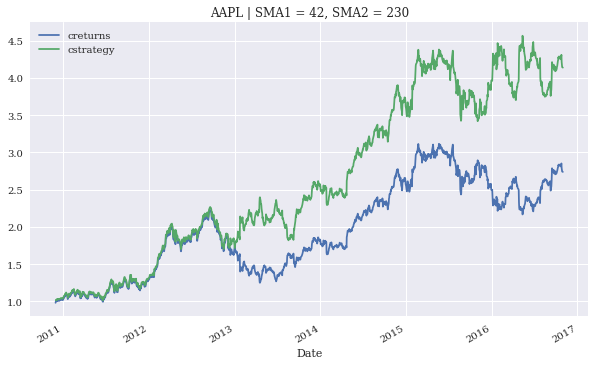

In [84]:
smabt.plot_results()
# plt.savefig('../../images/ch04/sma_plot_6.png')

## Strategies based on Momentum

### Getting into the Basics

In [85]:
%matplotlib inline
import numpy as np

In [86]:
import pandas as pd

In [87]:
from pandas_datareader import data as web

In [88]:
quandl_api_key = 'tazR87u-Jc7PsHZ2XV1-'
import quandl as q

In [89]:
#data = web.DataReader('AAPL', data_source='google', end='2016-10-31')['Close']
data = q.get('WIKI/AAPL', start_date='2010-1-1',end_date='2016-10-31', api_key=quandl_api_key)['Adj. Close']

In [90]:
data = pd.DataFrame(data)

In [91]:
data.rename(columns={'Adj. Close': 'price'}, inplace=True)

In [92]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [93]:
data['position'] = np.sign(data['returns'])

In [94]:
data['strategy'] = data['position'].shift(1) * data['returns']

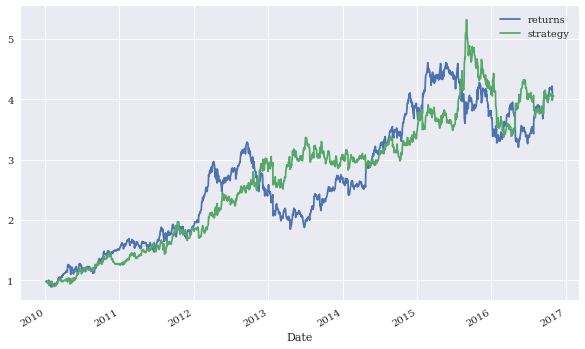

In [95]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))
# plt.savefig('../../images/ch04/mom_plot_1.png')

In [96]:
data['position'] = np.sign(data['returns'].rolling(2).mean()) 

In [97]:
data['strategy'] = data['position'].shift(1) * data['returns']

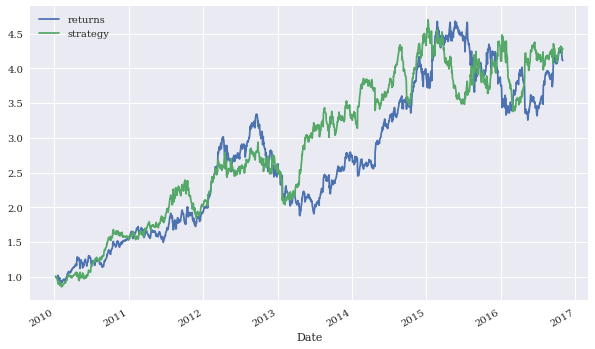

In [98]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))
# plt.savefig('../../images/ch04/mom_plot_2.png')

In [99]:
data['position'] = np.sign(data['returns'].rolling(6).mean()) 

In [100]:
data['strategy'] = data['position'].shift(1) * data['returns']

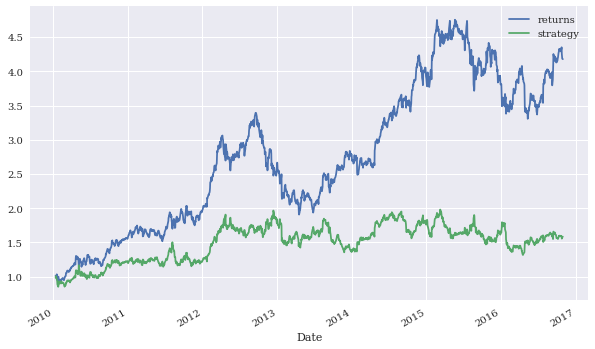

In [101]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))
# plt.savefig('../../images/ch04/mom_plot_3.png')

In [102]:
data['position'] = 0 - np.sign(data['returns'].rolling(6).mean()) 

In [103]:
data['strategy'] = data['position'].shift(1) * data['returns']

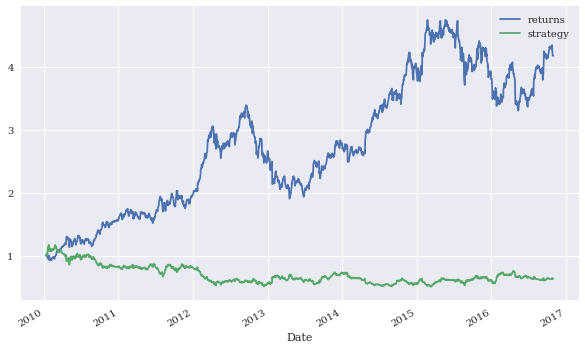

In [104]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

In [105]:
h5 = pd.HDFStore('../data/AAPL_1min_11112016.h5')

In [106]:
data = h5['AAPL']

In [107]:
h5.close()

In [108]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))

In [109]:
to_plot = ['returns']

In [110]:
for m in [1, 3, 5]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = data['position_%d' % m].shift(1) * data['returns']
    to_plot.append('strategy_%d' % m)

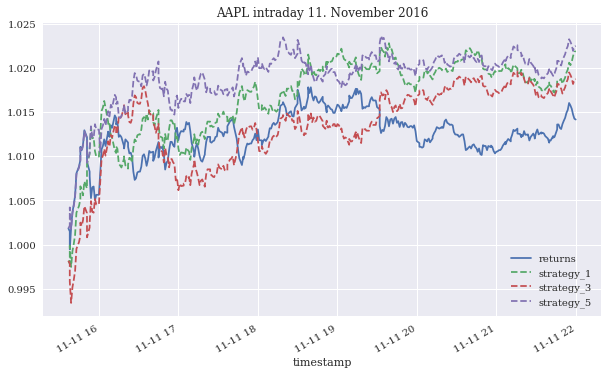

In [111]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='AAPL intraday 11. November 2016',
    figsize=(10, 6), style=['-', '--', '--', '--'])
# plt.savefig('../../images/ch04/mom_plot_4.png')

In [112]:
h5 = pd.HDFStore('../data/SP500_1min_11112016.h5')

In [113]:
h5.iloc[:]

AttributeError: 'HDFStore' object has no attribute 'iloc'

In [ ]:
data = h5['GSPC']

In [ ]:
h5.close()

In [ ]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))

In [ ]:
to_plot = ['returns']

In [ ]:
for m in [1, 3, 5]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = data['position_%d' % m].shift(1) * data['returns']
    to_plot.append('strategy_%d' % m)

In [ ]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='S&P 500 (^GSPC) intraday 11. November 2016',
    figsize=(10, 6), style=['-', '--', '--', '--'])
# plt.savefig('../../images/ch04/mom_plot_5.png')

### Generalizing the Approach

In [116]:
%matplotlib inline
import MomVectorBacktester as Mom

In [117]:
#reload(Mom)

In [118]:
mombt = Mom.MomVectorBacktester('AAPL', '2010-1-1', '2016-10-31', 10000, 0.0)

In [119]:
mombt.run_strategy(momentum=2)

(42836.23, 2274.27)

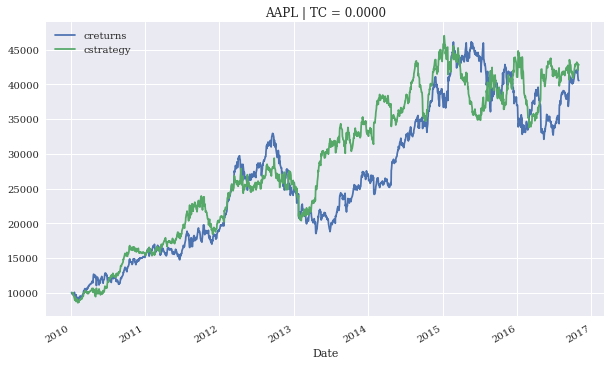

In [120]:
mombt.plot_results()
# plt.savefig('../../images/ch04/mom_plot_6.png')

In [121]:
mombt = Mom.MomVectorBacktester('AAPL', '2010-1-1', '2016-10-31', 10000, 0.001)

In [122]:
mombt.run_strategy(momentum=2)

(25264.09, -15297.87)

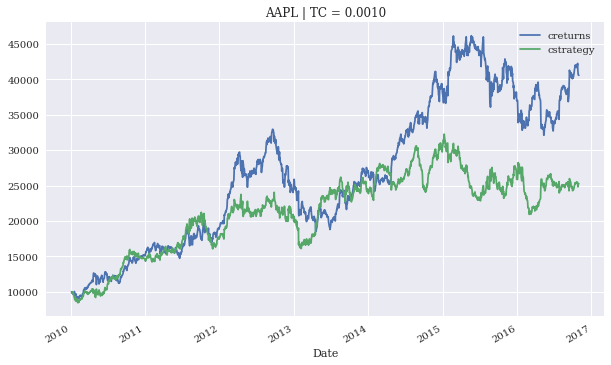

In [123]:
mombt.plot_results()
# plt.savefig('../../images/ch04/mom_plot_7.png')

## Strategies based on Mean-Reversion

### Getting into the Basics

In [124]:
%matplotlib inline
import numpy as np

In [125]:
import pandas as pd

In [126]:
from pandas_datareader import data as web

In [127]:
import quandl as q
quandl_api_key = 'tazR87u-Jc7PsHZ2XV1-'

In [128]:
#data = web.DataReader('GLD', data_source='google', end='2016-10-31')['Close']

In [129]:
data = q.get('WGC/GOLD_DAILY_USD', start_date='2010-01-01', end_date='2016-10-31', api_key=quandl_api_key)[Value]

NameError: name 'Value' is not defined

In [ ]:
data

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.rename(columns={'Adj. Close': 'price'}, inplace=True)

In [ ]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [ ]:
SMA = 50

In [ ]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [ ]:
threshold = 10

In [ ]:
data['distance'] = data['price'] - data['SMA']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')
# plt.savefig('../../images/ch04/mr_plot_1.png')

In [ ]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)

In [ ]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])

In [ ]:
data['position'] = np.where(data['distance'] *
            data['distance'].shift(1) < 0, 0, data['position'])

In [ ]:
data['position'] = data['position'].ffill().fillna(0)

In [ ]:
data['position'].ix[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6))
# plt.savefig('../../images/ch04/mr_plot_2.png')

In [ ]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [ ]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))
# plt.savefig('../../images/ch04/mr_plot_3.png')

### Generalizing the Approach 

In [ ]:
import MRVectorBacktester as MR

In [ ]:
mrbt = MR.MRVectorBacktester('GDX', '2010-1-1', '2016-10-31', 10000, 0.0025)

In [ ]:
mrbt.run_strategy(SMA=50, threshold=5)

In [ ]:
mrbt.plot_results()
# plt.savefig('../../images/ch04/mr_plot_4.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>